In [ ]:
#https://www.kaggle.com/neuromusic/avocado-prices 

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from keras.callbacks import ModelCheckpoint

# REGRESSION

In [490]:
df = pd.read_csv('avocado.csv').drop(['Unnamed: 0'], axis=1)

AttributeError: 'Index' object has no attribute 'type'

In [491]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [492]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [493]:
df.region.nunique()

54

In [473]:
df.type.nunique()

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [494]:
df = pd.get_dummies(df)

In [495]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0,0,0,0,0,0,0,0,0,0


In [511]:
dataset1 =  df.sample(frac=0.8,random_state=0)
dataset2 = df.drop(dataset1.index)

In [512]:
stats = dataset1.describe()
stats.pop("AveragePrice")
stats = stats.transpose()
stats.head()

,count,mean,std,min,25%,50%,75%,max
Total Volume,14599.0,847665.106224,3.452565e+06,84.56,10569.600,104369.68,424840.115,61034457.10
4046,14599.0,289886.455496,1.258964e+06,0.00,824.785,8180.90,107714.035,22743616.17
4225,14599.0,294864.038283,1.203045e+06,0.00,2925.660,28203.40,145035.480,20470572.61
4770,14599.0,22827.543374,1.090058e+05,0.00,0.000,173.19,6098.020,2546439.11
Total Bags,14599.0,240084.769833,9.906858e+05,0.00,4914.545,38515.75,109854.380,16394524.11


In [513]:
labels1,labels2 = dataset1.pop('AveragePrice'),dataset2.pop('AveragePrice')


In [514]:
def norm_data(x):
  return (x - stats['mean']) / stats['std']
normed1,normed2 = norm_data(dataset1), norm_data(dataset2)


In [482]:

import keras
def model_create():
  model = keras.Sequential([
    
    keras.layers.Dense(64, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(2, activation=tf.nn.relu),  
    keras.layers.Dense(1)
  ])

  optimizer = tf.train.RMSPropOptimizer(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model
model = model_create()

In [483]:
filepath= 'regression.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_mean_absolute_error', verbose=1, 
                             save_best_only=True, mode='min')

In [ ]:
history = model.fit( normed1, labels1 ,epochs=1000, validation_split = 0.2, callbacks=[checkpoint])

In [503]:
from keras.models import Model, load_model
from keras.models import Sequential
model = Sequential()
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
 model = load_model('regression.h5')

C:\Users\User\Anaconda5\lib\site-packages\keras\engine\saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [504]:
model.compile(loss='mse',
                optimizer=tf.train.RMSPropOptimizer(0.001),
                metrics=['mae', 'mse'])

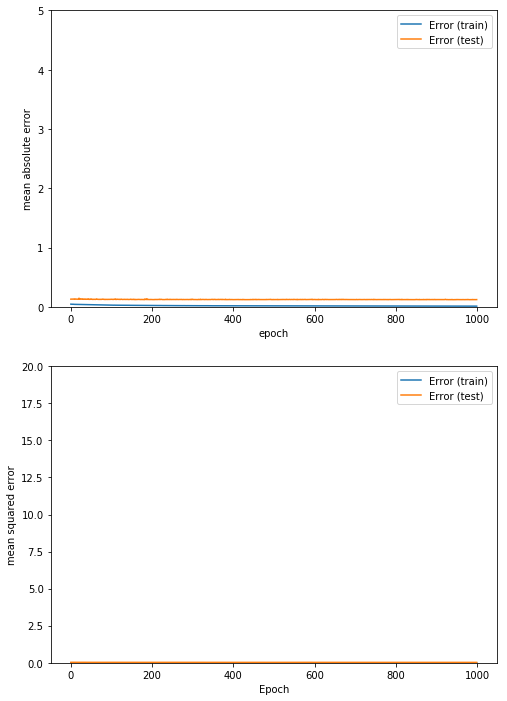

In [505]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('epoch')
  plt.ylabel('mean absolute error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Error (train)')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Error (test)')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('mean squared error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Error (train)')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Error (test)')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)

In [537]:
n = 121

In [538]:
print('predict price: '+str(model.predict(normed2)[n][0]))

predict price: 0.76370054


In [539]:
print('Correct price: '+str(labels2.as_matrix()[n]))

Correct price: 0.79


C:\Users\User\Anaconda5\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [519]:
loss, mae, mse = model.evaluate(normed2, labels2, verbose=0)
print(str(loss)+'___'+str(mae)+'___'+str(mse))

0.027530066065732644___0.12121050364350619___0.027530066065732644


# CLASSIFICATION

In [496]:
X = df.drop(['type'], axis=1)
y = df.type

KeyError: "['type'] not found in axis"

In [237]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.42, random_state=42)

In [238]:
rf = RandomForestClassifier()

In [250]:
param = {'criterion':['entropy','gini'], 'max_depth':range(1,20),'n_estimators':range(5,20,1)}

In [251]:
gr = GridSearchCV(rf,param, n_jobs=-1)
gr.fit(X_train, y_train)

C:\Users\User\Anaconda5\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda5\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'criterion': ['entropy', 'gini'], 'max_depth': range(1, 20), 'n_estimators': range(5, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [252]:
rf = gr.best_estimator_
rf.score(X_test, y_test)

0.734375